<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/seminar_6_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression line and the center of mass

Show that the regression line always passes through the center of mass of the point cloud - the point  (⟨x⟩,⟨y⟩) .

#Coefficient of Determination

Generate $3$ point clouds on a plane with different shapes which coefficient of detemination for simple linear regression is close to $0$.

#$sin$ regression and Taylor series

Suupose you sampled $sin$ function

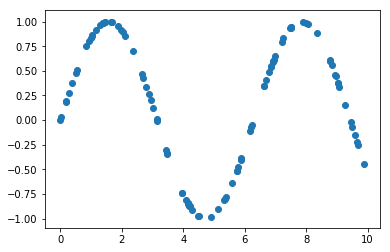

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

rng = np.random.RandomState(1)
N=100
x = 10 * rng.rand(N)
y = np.sin(x)
plt.scatter(x, y)

You can approximate $sin$ with the polynomial.

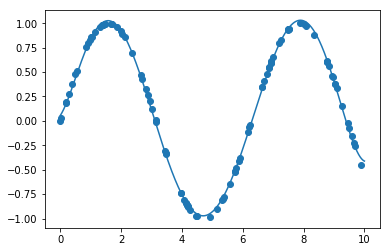

In [0]:
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);



Its coefficients are

In [0]:
coeffs = poly_model[1].coef_
print(coeffs)

[ 0.00000000e+00  4.76502622e-01  9.43383248e-01 -8.31361918e-01
  2.19572167e-01 -2.48601913e-02  1.20814081e-03 -1.86051194e-05]


Taylor expansion
$$
sin(x)=x-\frac{x^3}{3!}+\frac{x^5}{5!}-\frac{x^7}{7!}+\cdots \approx x-0.167\, x^3+0.0083\, x^5+0.000198 \, x^7.
$$

The coefficients do not look alike the coefficients we obtained.

1) Maybe we got not enough points? Explore.


2) Our polynomic expansion contains $x$s with even powers while $sin$ Taylor series has only odd powers of $x$. Maybe we could use Lasso regression to eliminate even powers and fix coefficients in front of the odd powers? Explore.

3)Maybe there is something wrong with the interval $[0,10]$? Maybe its better to choose another interval? 

#Interpolation, regression, approximation

Do you understand a difference between interpolation, regression, approximation? Can you give examples of each?